In [2]:
# Importing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Reading Data
useful_cols = ['WAGP','SEX', 'AGEP','RAC1P','RAC3P','SCHL', 'WKW','WKHP','OCCP','POWSP','REGION']
P_US_18A = pd.read_csv('data/psam_pusa.csv', usecols = useful_cols)
P_US_18B = pd.read_csv('data/psam_pusb.csv', usecols = useful_cols)

In [ ]:
print (P_US_18A.shape, P_US_18B.shape)

In [ ]:
pus_sets = [P_US_18A,P_US_18B]
PUS18_full = pd.concat(pus_sets)
PUS18_full.shape

In [ ]:
PUS18_full.columns

In [ ]:
PUS18_full.describe()

In [ ]:
g = sns.kdeplot(PUS18_full["AGEP"][(PUS18_full["SEX"] == 1) & (PUS18_full["AGEP"].notnull())])
g = sns.kdeplot(PUS18_full["AGEP"][(PUS18_full["SEX"] == 2) & (PUS18_full["AGEP"].notnull())])
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g=g.legend(["Male","Female"])

In [ ]:
ax = sns.distplot(PUS18_full["AGEP"][(PUS18_full["SEX"] == 1)], bins=20, kde=False)
ax = sns.distplot(PUS18_full["AGEP"][(PUS18_full["SEX"] == 2)], bins=20, kde=False)

In [ ]:
g = sns.kdeplot(PUS18_full["WAGP"][(PUS18_full["WAGP"] > 0) & (PUS18_full["AGEP"] > 18)])

g.set_xlabel("Age")
g.set_ylabel("Frequency")

In [ ]:
ax = sns.distplot(PUS18_full["WAGP"][(PUS18_full["SEX"] == 1) & (PUS18_full["WAGP"] > 0) & (PUS18_full["WKW"] < 4) & (PUS18_full["WKHP"]  >= 35)], bins=40, kde=False)
ax = sns.distplot(PUS18_full["WAGP"][(PUS18_full["SEX"] == 2) & (PUS18_full["WAGP"] > 0) & (PUS18_full["WKW"] < 4) & (PUS18_full["WKHP"]  >= 35)], bins=40, kde=False)
ax.set(xlim=(0, 200000))
ax=ax.legend(["Male","Female"])

#### Full-Time Detection

In [ ]:
g = sns.distplot(PUS18_full["WAGP"][(PUS18_full["WAGP"] > 0) & (PUS18_full["WKW"] < 4) & (PUS18_full["WKHP"]  >= 35)], kde=False)
g = sns.distplot(PUS18_full["WAGP"][(PUS18_full["WAGP"] > 0)], kde=False)

In [ ]:
# define function to seperate people who've worked more than 40 weeks / year
def full_time_detect(df):
    # remove rows of people who work under 40 weeks in a year
    df['WKW'] = df['WKW'].map(lambda y: 1 if y < 4
                              else 0)
    df = df.loc[df.WKW != 0].copy()

    # remove rows of people who work under 35 hours a week
    df['WKHP'] = df['WKHP'].map(lambda y: 1 if y >= 35
                                else 0)
    df = df.loc[df.WKHP != 0].copy()
    return df

In [ ]:
ft_test = PUS18_full.copy()
ft_test = full_time_detect(ft_test)
ft_test.describe()

In [ ]:
ft_test.shape

## Outlier Testing

In [ ]:
ax = sns.boxplot(x=ft_test["AGEP"])

In [1]:
age_IQR = df.ft_test.quantile([0.75]) - df.ft_test.quantile([0.25])
age_IQR

NameError: name 'df' is not defined

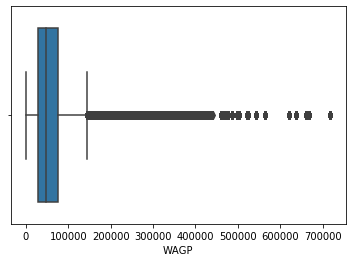

In [78]:
ax = sns.boxplot(x=ft_test["WAGP"])

In [82]:
df = ft_test.copy()
df = df.loc[df.WAGP >= 12000].copy()
df = df.loc[df.WAGP <= 175000].copy()
df.shape

(1020883, 11)

##### Age Bins

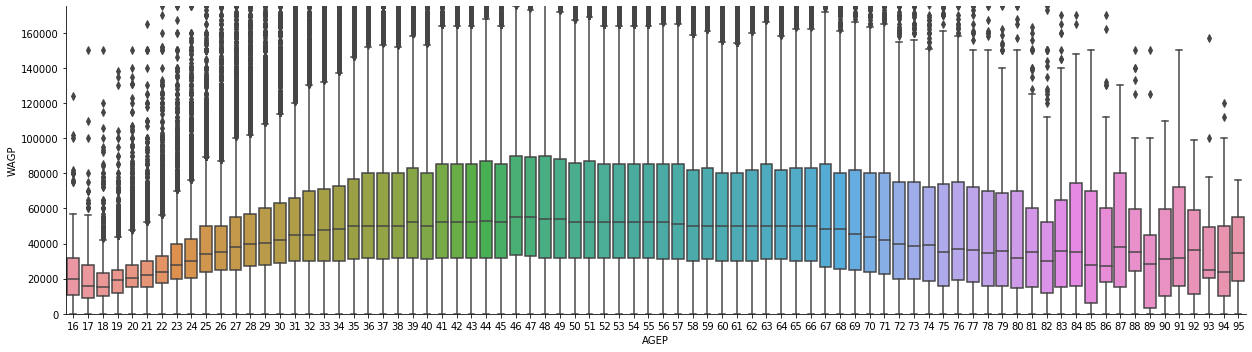

In [15]:
g = sns.catplot(y="WAGP", x="AGEP", data=ft_test, kind="box", aspect = 3.5)
g.set(ylim=(0, 175000))

In [16]:
def age_bins(df):
    df['AGEB'] = df['AGEP'].map(lambda y: "16-23" if y < 24
                                else "24-28" if y < 29
                                else "29-34" if y < 35
                                else "35-39" if y < 40
                                else "40-49" if y < 50
                                else "50-59" if y < 60
                                else "60-69" if y < 70
                                else "70+")
    return df

In [17]:
age_test = ft_test.copy()
age_test.sort_values(by=['AGEP'], ascending=True, inplace=True)

In [18]:
age_bins(age_test)
print("Age :", age_test.AGEB.unique())

Age : ['16-23' '24-28' '29-34' '35-39' '40-49' '50-59' '60-69' '70+']


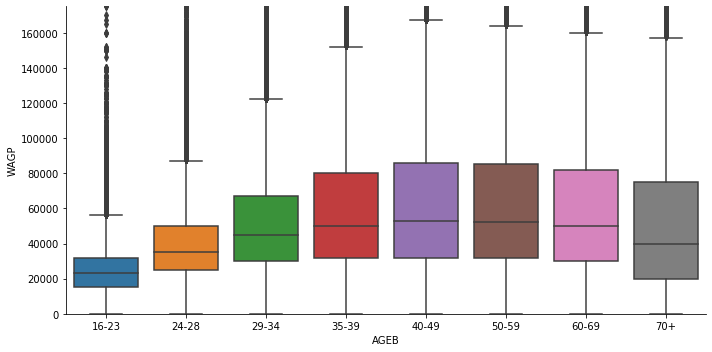

In [19]:
g = sns.catplot(y="WAGP", x="AGEB", data=age_test, kind="box", aspect = 2)
g.set(ylim=(0, 175000))

In [20]:
age_test['AGEB'].value_counts()

50-59    277322
40-49    256984
29-34    153830
60-69    143487
35-39    128361
24-28    114144
16-23     54220
70+       20268
Name: AGEB, dtype: int64

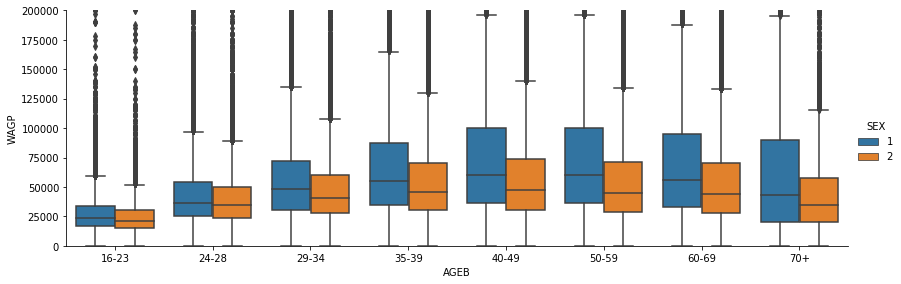

In [22]:
g = sns.catplot(y="WAGP", x="AGEB", data=age_test, kind="box", height = 4, aspect = 3, hue = "SEX")
g.set(ylim=(0, 200000))

#### Education Split
- NH: No High-school Degree
- HS: Highschool Diploma (or GED)
- SC: Some College
- AS: Associate's degree
- BS: Bachelor's degree
- GD: Graduate Degree
- DR: Doctorate Degree

In [23]:
age_test['SCHL'].value_counts()

21.0    278539
16.0    230488
19.0    157667
22.0    126134
20.0    111201
18.0     77612
17.0     36937
23.0     32470
24.0     21763
15.0     16444
14.0     12103
1.0      10300
13.0      9667
12.0      8465
9.0       6609
11.0      5809
10.0      1741
8.0       1406
6.0       1176
7.0        879
5.0        525
4.0        292
2.0        210
3.0        179
Name: SCHL, dtype: int64

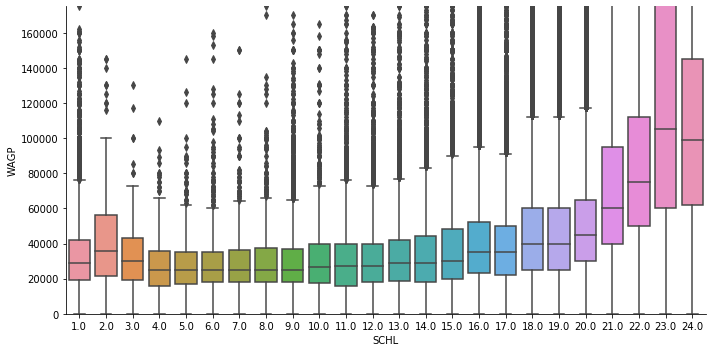

In [24]:
g = sns.catplot(y="WAGP", x="SCHL", data=age_test, kind="box", aspect = 2)
g.set(ylim=(0, 175000))

In [25]:
def edu_split(df):
    #split into degrees
    df['EDU'] = df['SCHL'].map(lambda y: "HS" if y <= 17
                                else "AS" if y <= 20
                               else "BS" if y == 21
                                else "MS" if y == 22
                                else "GS")
    return df

In [26]:
edu_test = age_test.copy()
edu_test = edu_split(edu_test)
print("Edu :", edu_test.EDU.unique())

Edu : ['HS' 'AS' 'BS' 'MS' 'GS']


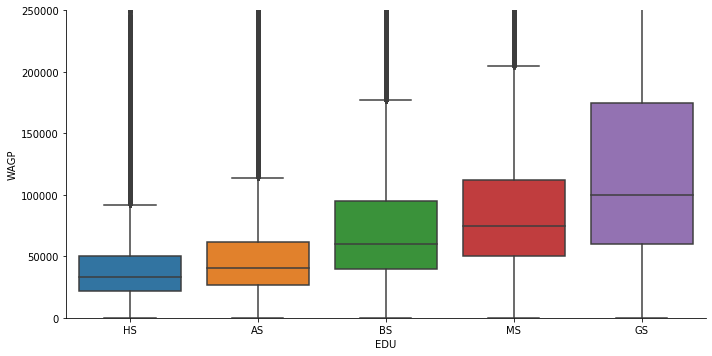

In [27]:
g = sns.catplot(y="WAGP", x="EDU", data=edu_test, kind="box", aspect = 2)
g.set(ylim=(0, 250000))

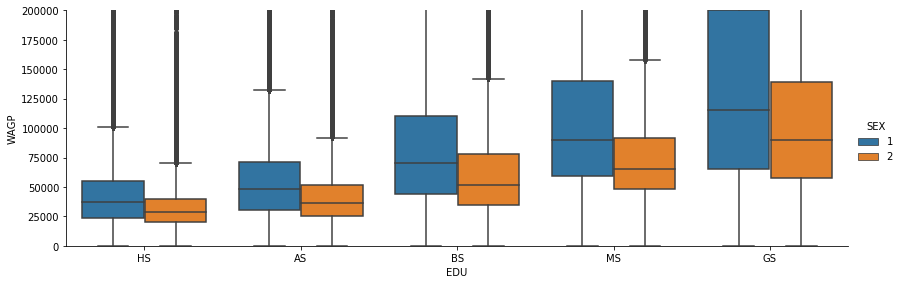

In [28]:
g = sns.catplot(y="WAGP", x="EDU", data=edu_test, kind="box", height = 4, aspect = 3, hue = "SEX")
g.set(ylim=(0, 200000))

In [29]:
edu_test['EDU'].value_counts()

AS    346480
HS    343230
BS    278539
MS    126134
GS     54233
Name: EDU, dtype: int64

#### Occupation Split
- 0010-0960: Management, Business, and Financial Occupations
- 1005-1980: Computer, Engineering, and Science Occupations
- 2001-2970: Education, Legal, Community Service, Arts, and Media Occupations
- 3000-3550: Healthcare Practitioners and Technical Occupations
- 3601-4655: Service Occupations
- 4700-5940: Sales and Office Occupations
- 6005-7640: Natural Resources, Construction, and Maintenance Occupations
- 7700-8990: Production Occupations
- 9005-9760: Transportation and Material Moving Occupations
- 9800-9830: Military Specific Occupations

In [30]:
def int_occ_split(df):
    # split into occupational industries
    df['JOB'] = df['OCCP'].map(lambda y: "Business" if y <= 960
                                else "Science" if y <= 1980
                                else "Arts" if y <= 2970
                                else "Healthcare" if y <= 3550
                                else "Service" if y <= 4655
                                else "Sales" if y <= 5940
                                else "Maintenance" if y <= 7640
                                else "Production" if y <= 8990
                                else "Transportation" if y <= 9760
                                else "Military" if y <= 9830
                                else "UN")
    return df

In [31]:
int_occ_test = edu_test.copy()
int_occ_test = int_occ_split(int_occ_test)
print("Occ :", int_occ_test.JOB.unique())

Occ : ['Transportation' 'Sales' 'Production' 'Service' 'Maintenance' 'Business'
 'Healthcare' 'Arts' 'Science' 'Military']


In [32]:
int_occ_sort = int_occ_test.groupby('JOB').median().sort_values(by=['WAGP']).reset_index()
int_occ_list = int_occ_sort['JOB'].tolist()

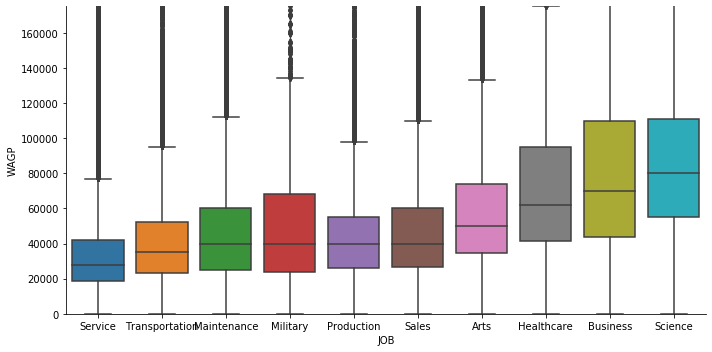

In [33]:
g = sns.catplot(y="WAGP", x="JOB", data=int_occ_test, kind="box", aspect = 2, order = int_occ_list)
g.set(ylim=(0, 175000))

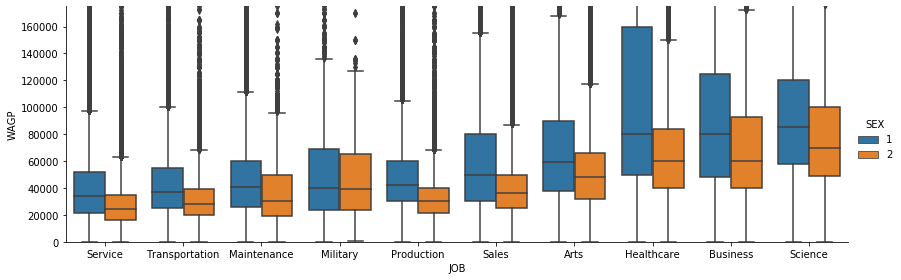

In [34]:
g = sns.catplot(y="WAGP", x="JOB", data=int_occ_test, kind="box", height = 4, aspect = 3, hue = "SEX", order = int_occ_list)
g.set(ylim=(0, 175000))

In [35]:
int_occ_test['JOB'].value_counts()

Sales             230983
Business          221863
Service           142439
Arts              127689
Maintenance       109861
Science            84230
Transportation     79729
Healthcare         73740
Production         73142
Military            4940
Name: JOB, dtype: int64

In [36]:
def occ_split(df):
    # split into occupational industries
    df['JOB'] = df['OCCP'].map(lambda y: "BUS" if y <= 960
                                else "SC/HC" if y <= 1980
                                else "ART" if y <= 2970
                                else "SC/HC" if y <= 3550
                                else "SER" if y <= 4655
                                else "SAL" if y <= 5940
                                else "PRO" if y <= 7640
                                else "PRO" if y <= 8990
                                else "PRO" if y <= 9760
                                else "PRO" if y <= 9830
                                else "UN")
    return df

In [37]:
occ_test = edu_test.copy()
occ_test = occ_split(occ_test)
print("Occ :", occ_test.JOB.unique())

Occ : ['PRO' 'SAL' 'SER' 'BUS' 'SC/HC' 'ART']


In [38]:
occ_test['JOB'].value_counts()

PRO      267672
SAL      230983
BUS      221863
SC/HC    157970
SER      142439
ART      127689
Name: JOB, dtype: int64

In [39]:
occ_sort = occ_test.groupby('JOB').median().sort_values(by=['WAGP']).reset_index()
occ_list = occ_sort['JOB'].tolist()

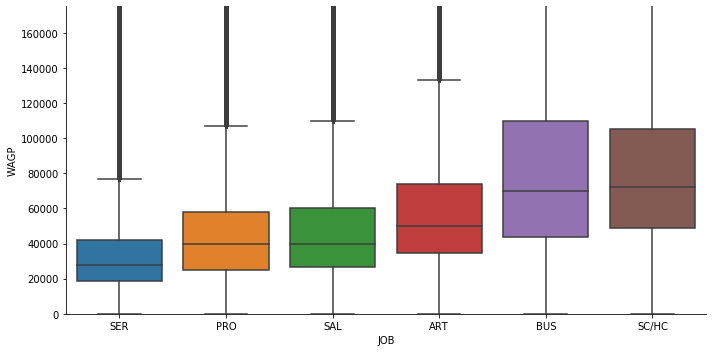

In [40]:
g = sns.catplot(y="WAGP", x="JOB", data=occ_test, kind="box", aspect = 2, order = occ_list)
g.set(ylim=(0, 175000))

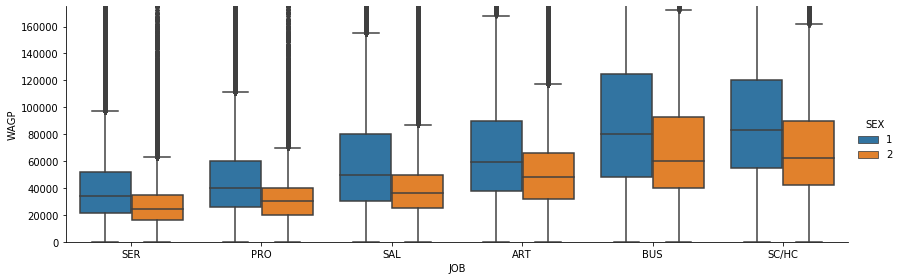

In [41]:
g = sns.catplot(y="WAGP", x="JOB", data=occ_test, kind="box", height = 4, aspect = 3, hue = "SEX", order = occ_list)
g.set(ylim=(0, 175000))

#### State - POWSP

In [42]:
state_sort = occ_test.groupby('POWSP').median().reset_index()
state_sort['reg_code'] = ['3', '4', '4', '3', '4', '4', '1', '3', '3', '3',
                          '3', '4', '4', '2', '2', '2', '2', '3', '3', '1',
                          '3', '1', '2', '2', '3', '2', '4', '2', '4', '1',
                          '1', '4', '1', '3', '2', '2', '3', '4', '1', '1',
                          '3', '2', '3', '3', '4', '1', '3', '4', '3', '2',
                          '4', '5', '5', '5', '5', '5', '5', '5', '5']
state_sort = state_sort.sort_values(by=['WAGP'])
state_list = state_sort['POWSP'].tolist()

In [43]:
reg_sort = state_sort.sort_values(by=['reg_code'])
reg_list = reg_sort['POWSP'].tolist()

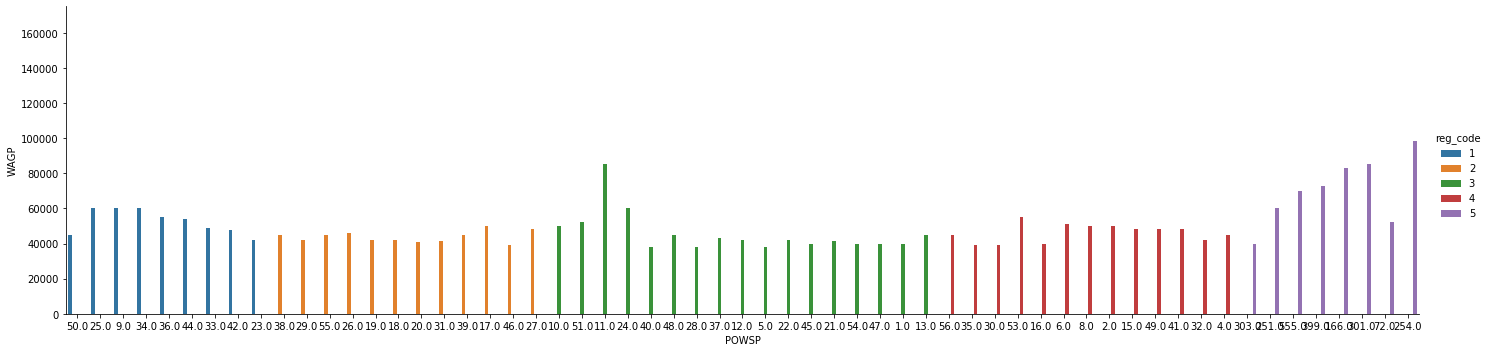

In [44]:
g = sns.catplot(y="WAGP", x="POWSP", hue = 'reg_code', data=reg_sort, kind="bar", aspect = 4, order = reg_list)
g.set(ylim=(0, 175000))

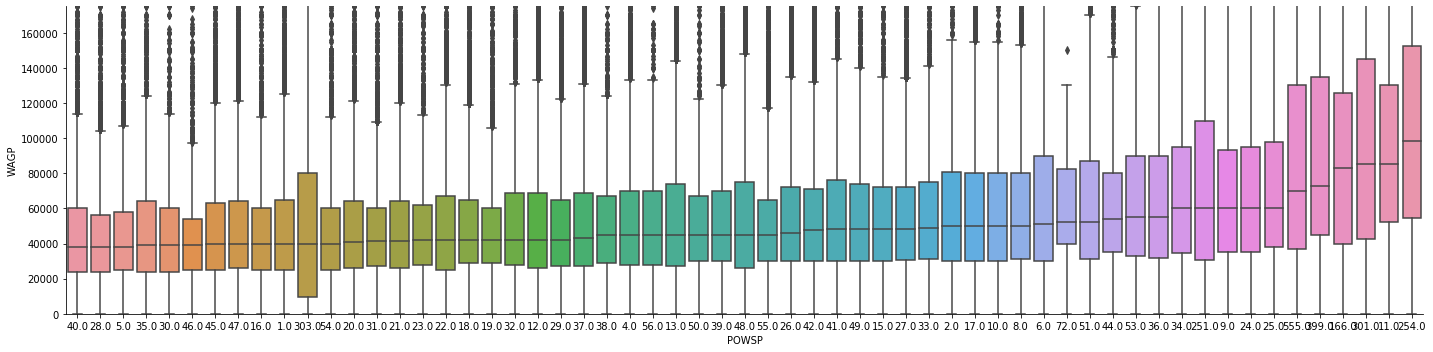

In [45]:
g = sns.catplot(y="WAGP", x="POWSP", data=occ_test, kind="box", aspect = 4, order = state_list)
g.set(ylim=(0, 175000))

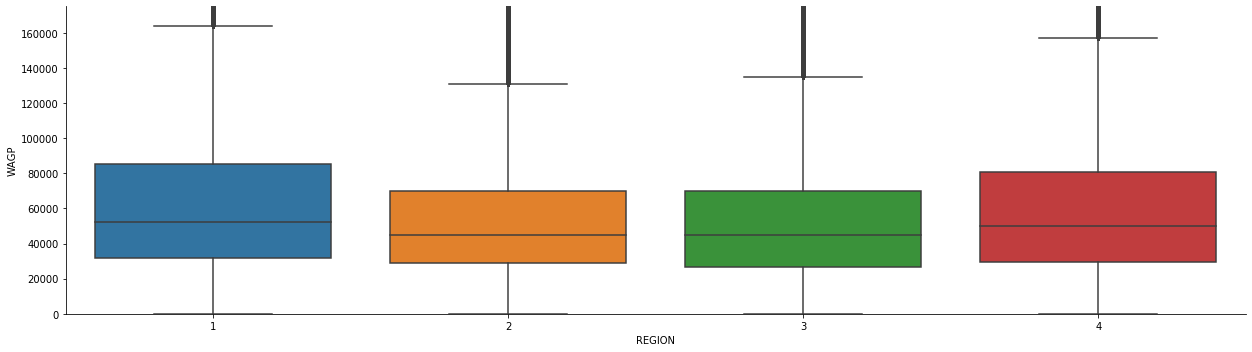

In [46]:
g = sns.catplot(y="WAGP", x="REGION", data=ft_test, kind="box", aspect = 3.5)
g.set(ylim=(0, 175000))

In [47]:
print (state_list)

[40.0, 28.0, 5.0, 35.0, 30.0, 46.0, 45.0, 47.0, 16.0, 1.0, 303.0, 54.0, 20.0, 31.0, 21.0, 23.0, 22.0, 18.0, 19.0, 32.0, 12.0, 29.0, 37.0, 38.0, 4.0, 56.0, 13.0, 50.0, 39.0, 48.0, 55.0, 26.0, 42.0, 41.0, 49.0, 15.0, 27.0, 33.0, 2.0, 17.0, 10.0, 8.0, 6.0, 72.0, 51.0, 44.0, 53.0, 36.0, 34.0, 251.0, 9.0, 24.0, 25.0, 555.0, 399.0, 166.0, 301.0, 11.0, 254.0]


In [48]:
def state_split(df):
    # split into higher paying states
    df['STSP'] = df['POWSP'].map(lambda y: 1 if y in [6.0, 72.0, 51.0, 44.0, 53.0, 36.0, 34.0, 251.0, 9.0, 24.0, 25.0, 555.0, 399.0, 166.0, 301.0, 11.0, 254.0]
                                 else 2 if y in [55.0, 26.0, 42.0, 41.0, 49.0, 15.0, 27.0, 33.0, 2.0, 17.0, 10.0, 8.0]
                                 else 3 if y in [29.0, 37.0, 38.0, 4.0, 56.0, 13.0, 50.0, 39.0, 48.0]
                                 else 4 if y in [40.0, 28.0, 5.0, 35.0, 30.0, 46.0, 45.0, 47.0, 16.0, 1.0, 303.0, 54.0, 20.0, 31.0, 21.0, 23.0, 22.0, 18.0, 19.0, 32.0, 12.0]
                                 else 5)
    test = df.loc[df['STSP'] == 5].copy()
    df = df.loc[df['STSP'] != 5]
    test['STSP'] = test['REGION'].map(lambda y: 1 if y == 1
                                      else 2 if y == 4
                                      else 3 if y == 2
                                      else 4 if y == 3
                                      else 10)
    df = pd.concat([df, test])

    return df

In [49]:
state_test = occ_test.copy()
state_test = state_split(state_test)
print("State :", state_test.STSP.unique())

State : [1 4 3 2]


In [50]:
state_test['STSP'].value_counts()

1    364350
4    285129
3    264979
2    234158
Name: STSP, dtype: int64

In [51]:
state_sort = state_test.groupby('STSP').median().sort_values(by=['WAGP']).reset_index()
state_list = state_sort['STSP'].tolist()

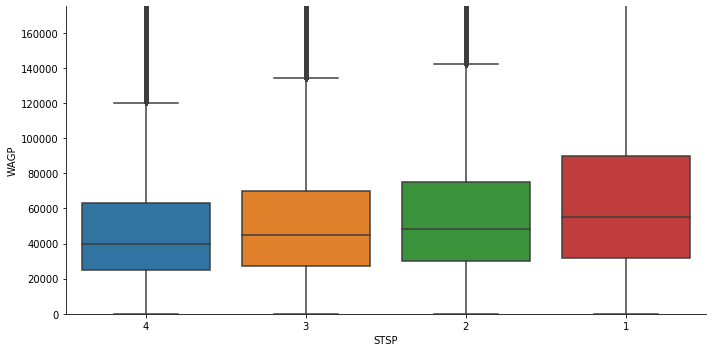

In [52]:
g = sns.catplot(y="WAGP", x="STSP", data=state_test, kind="box", aspect = 2, order = state_list)
g.set(ylim=(0, 175000))

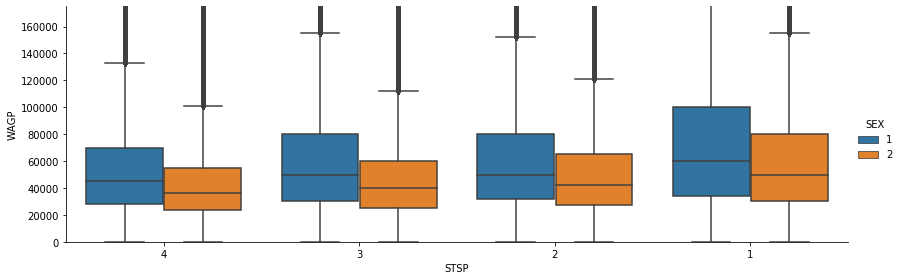

In [53]:
g = sns.catplot(y="WAGP", x="STSP", data=state_test, kind="box", height = 4, aspect = 3, hue = "SEX", order = state_list)
g.set(ylim=(0, 175000))

#### Ethnicity - RAC1P

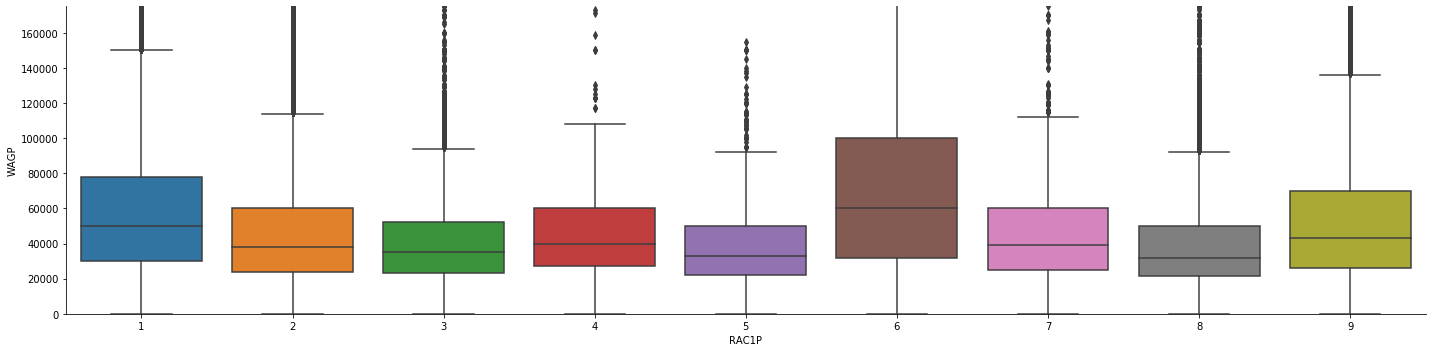

In [54]:
g = sns.catplot(y="WAGP", x="RAC1P", data=state_test, kind="box", aspect = 4)
g.set(ylim=(0, 175000))

In [55]:
state_test['RAC1P'].value_counts()

1    900011
2     99064
6     68681
8     43117
9     26119
3      7918
7      1993
5      1359
4       354
Name: RAC1P, dtype: int64

In [56]:
def int_race_split(df):
    # split into occupational industries
    df['RACE'] = df['RAC3P'].map(lambda y: "WHT" if y == 1
                               else "BLK" if y == 2
                               else "IND" if y == 3
                               else "ASN" if y <= 10
                               else "ISL" if y <= 14
                               else "NAN" if y == 15
                               else "WHT" if y <= 29
                               else "BLK" if y <= 38
                               else "IND" if y <= 41
                               else "ASN" if y <= 58
                               else "ISL" if y == 59
                               else "WHT" if y <= 70
                               else "ASN" if y == 71
                               else "WHT" if y <= 73
                               else "BLK" if y <= 75
                               else "ASN" if y <= 77
                               else "WHT" if y <= 89
                               else "BLK" if y <= 91
                               else "ASN" if y <= 98
                               else "ISL" if y == 99
                               else "WHT" if y == 100
                               else "UN")
    return df

In [57]:
int_race_test = state_test.copy()
int_race_test = int_race_split(int_race_test)
print("RACE :", int_race_test.RACE.unique())

RACE : ['NAN' 'WHT' 'ASN' 'BLK' 'ISL' 'IND']


In [58]:
int_race_test['RACE'].value_counts()

WHT    922064
BLK    100971
ASN     70331
NAN     43117
IND     10029
ISL      2104
Name: RACE, dtype: int64

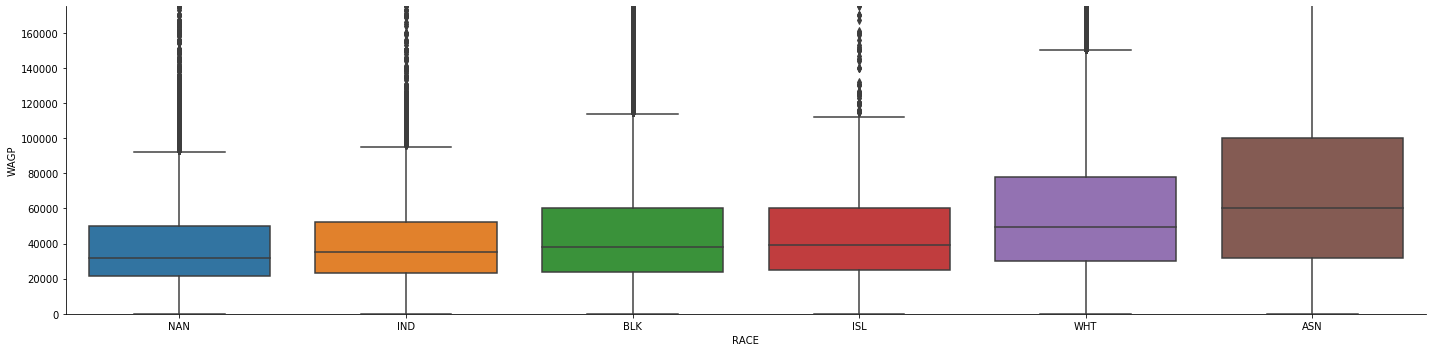

In [59]:
int_race_sort = int_race_test.groupby('RACE').median().sort_values(by=['WAGP']).reset_index()
int_race_list = int_race_sort['RACE'].tolist()
g = sns.catplot(y="WAGP", x="RACE", data=int_race_test, kind="box", aspect = 4, order = int_race_list)
g.set(ylim=(0, 175000))

In [60]:
def race_split(df):
    # split into occupational industries
    df['RACE'] = df['RAC3P'].map(lambda y: "WHT" if y == 1
                               else "BLK" if y == 2
                               else "IND" if y == 3
                               else "ASN" if y <= 10
                               else "ISL" if y <= 14
                               else "NAN" if y == 15
                               else "WHT" if y <= 29
                               else "BLK" if y <= 38
                               else "IND" if y <= 41
                               else "ASN" if y <= 58
                               else "ISL" if y == 59
                               else "WHT" if y <= 70
                               else "ASN" if y == 71
                               else "WHT" if y <= 73
                               else "BLK" if y <= 75
                               else "ASN" if y <= 77
                               else "WHT" if y <= 89
                               else "BLK" if y <= 91
                               else "ASN" if y <= 98
                               else "ISL" if y == 99
                               else "WHT" if y == 100
                               else "UN")
    df['RACE'] = df['RACE'].map(lambda y: "WHT" if y in ['WHT']
                               else "BLK" if y in ['BLK','NAN','ISL','IND']
                               else "ASN" if y in ['ASN']
                               else "UN")
    return df

In [61]:
race_test = state_test.copy()
race_test = race_split(race_test)
print("RACE :", race_test.RACE.unique())

RACE : ['BLK' 'WHT' 'ASN']


In [62]:
race_test['RACE'].value_counts()

WHT    922064
BLK    156221
ASN     70331
Name: RACE, dtype: int64

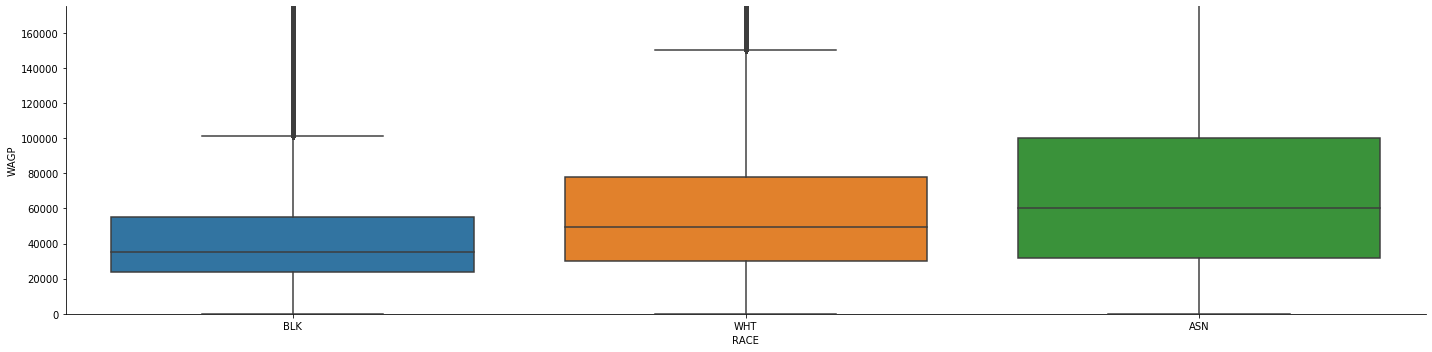

In [63]:
race_sort = race_test.groupby('RACE').median().sort_values(by=['WAGP']).reset_index()
race_list = race_sort['RACE'].tolist()
g = sns.catplot(y="WAGP", x="RACE", data=race_test, kind="box", aspect = 4, order = race_list)
g.set(ylim=(0, 175000))

#### Remove Columns

In [64]:
race_test.columns

Index(['REGION', 'AGEP', 'SCHL', 'SEX', 'WAGP', 'WKHP', 'WKW', 'OCCP', 'POWSP',
       'RAC1P', 'RAC3P', 'AGEB', 'EDU', 'JOB', 'STSP', 'RACE'],
      dtype='object')

In [65]:
race_test.describe(include='all')

,REGION,AGEP,SCHL,SEX,WAGP,WKHP,WKW,OCCP,POWSP,RAC1P,RAC3P,AGEB,EDU,JOB,STSP,RACE
count,1.148616e+06,1.148616e+06,1.148616e+06,1.148616e+06,1.148616e+06,1148616.0,1148616.0,1.148616e+06,1.112574e+06,1.148616e+06,1.148616e+06,1148616,1148616,1148616,1.148616e+06,1148616
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5,6,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50-59,AS,PRO,NaN,WHT
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,277322,346480,267672,NaN,922064
mean,2.652849e+00,4.428583e+01,1.884832e+01,1.434923e+00,6.380350e+04,1.0,1.0,4.034222e+03,2.806745e+01,1.859758e+00,2.674443e+00,NaN,NaN,NaN,2.409960e+00,NaN
std,1.023858e+00,1.328489e+01,3.273379e+00,4.957471e-01,6.991563e+04,0.0,0.0,2.783980e+03,1.782020e+01,2.061159e+00,6.217854e+00,NaN,NaN,NaN,1.171659e+00,NaN
min,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.0,1.0,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN
25%,2.000000e+00,3.300000e+01,1.600000e+01,1.000000e+00,2.900000e+04,1.0,1.0,1.530000e+03,1.200000e+01,1.000000e+00,1.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN
50%,3.000000e+00,4.500000e+01,1.900000e+01,1.000000e+00,4.700000e+04,1.0,1.0,4.020000e+03,2.800000e+01,1.000000e+00,1.000000e+00,NaN,NaN,NaN,2.000000e+00,NaN
75%,3.000000e+00,5.500000e+01,2.100000e+01,2.000000e+00,7.500000e+04,1.0,1.0,5.810000e+03,4.200000e+01,1.000000e+00,1.000000e+00,NaN,NaN,NaN,3.000000e+00,NaN


In [66]:
def remove_col(df):
    remove_cols = ['REGION','AGEP','SCHL','WKHP','WKW','OCCP','POWSP','RAC1P','RAC3P']
    df = df.drop(remove_cols,axis=1)
    return df

In [67]:
remove_test = race_test.copy()
remove_test = remove_col(remove_test)
remove_test.describe(include='all')

,SEX,WAGP,AGEB,EDU,JOB,STSP,RACE
count,1.148616e+06,1.148616e+06,1148616,1148616,1148616,1.148616e+06,1148616
unique,NaN,NaN,8,5,6,NaN,3
top,NaN,NaN,50-59,AS,PRO,NaN,WHT
freq,NaN,NaN,277322,346480,267672,NaN,922064
mean,1.434923e+00,6.380350e+04,NaN,NaN,NaN,2.409960e+00,NaN
std,4.957471e-01,6.991563e+04,NaN,NaN,NaN,1.171659e+00,NaN
min,1.000000e+00,0.000000e+00,NaN,NaN,NaN,1.000000e+00,NaN
25%,1.000000e+00,2.900000e+04,NaN,NaN,NaN,1.000000e+00,NaN
50%,1.000000e+00,4.700000e+04,NaN,NaN,NaN,2.000000e+00,NaN
75%,2.000000e+00,7.500000e+04,NaN,NaN,NaN,3.000000e+00,NaN


#### Pipeline

In [68]:
def pp_pipeline(df):
    df = (df
          .pipe(full_time_detect)
          .pipe(age_bins)
          .pipe(edu_split)
          .pipe(occ_split)
          .pipe(state_split)
          .pipe(race_split)
         .pipe(remove_col))
    return df

In [69]:
pp_test = PUS18_full.copy()
pp_test = pp_pipeline(pp_test)

pp_test.head()

,SEX,WAGP,AGEB,EDU,JOB,STSP,RACE
14,1,29000.0,16-23,AS,SER,4,WHT
19,2,30000.0,50-59,AS,SAL,4,WHT
55,2,30000.0,50-59,AS,SAL,4,WHT
64,1,20000.0,16-23,AS,SER,4,BLK
80,2,10000.0,16-23,AS,BUS,4,WHT


In [70]:
group_test = pp_test.groupby(['SEX', 'AGEB', 'EDU', 'JOB'])
group_median = group_test.count()

group_median

WAGP  STSP  RACE
SEX AGEB  EDU JOB                    
1   16-23 AS  ART     316   316   316
              BUS     649   649   649
              PRO    5309  5309  5309
              SAL    1938  1938  1938
              SC/HC   657   657   657
...                   ...   ...   ...
2   70+   MS  BUS     223   223   223
              PRO      16    16    16
              SAL     122   122   122
              SC/HC    92    92    92
              SER      28    28    28

[478 rows x 3 columns]

In [71]:
group_test = pp_test.groupby(['SEX', 'AGEB', 'EDU', 'JOB', 'STSP','RACE'])
group_median = group_test.count()

group_median

WAGP
SEX AGEB  EDU JOB STSP RACE      
1   16-23 AS  ART 1    ASN      6
                       BLK     35
                       WHT     71
                  2    ASN      4
                       BLK      9
...                           ...
2   70+   MS  SER 3    BLK      1
                       WHT      3
                  4    ASN      1
                       BLK      1
                       WHT      4

[5383 rows x 1 columns]